# Image Segmentation using UNET

Imports

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

## Get and Load Dataset, Model and Helper Functions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/Membrane_Image_Segmentation

/content/drive/MyDrive/Colab Notebooks/Deep Learning/Membrane_Image_Segmentation


In [4]:
!ls

data	   img	    model_unet.py  README.md	    unet_membrane.keras
helper.py  LICENSE  __pycache__    trainUnet.ipynb


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Membrane_Image_Segmentation/helper')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Membrane_Image_Segmentation/model_unet')

In [6]:
import helper as hp
import model_unet as unet

## Train Unet with membrane data


### Train with data generator

In [7]:
print("GPU:", tf.config.list_physical_devices("GPU"))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
train_ds = hp.make_segmentation_dataset(
    image_dir="/content/drive/MyDrive/Colab Notebooks/Deep Learning/Membrane_Image_Segmentation/data/membrane/train/image",
    mask_dir="/content/drive/MyDrive/Colab Notebooks/Deep Learning/Membrane_Image_Segmentation/data/membrane/train/label",
    batch_size=2,
    target_size=(256, 256),
    image_color_mode="grayscale",
    shuffle=True,
    seed=1,
    binarize_mask=True
)

unet_model = unet.unet()

checkpoint = keras.callbacks.ModelCheckpoint(
    "unet_membrane.keras",
    monitor="loss",
    verbose=1,
    save_best_only=True
)

unet_model.fit(
    train_ds,
    epochs=50,
    callbacks=[checkpoint]
)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - dice_coef: 0.7643 - loss: 0.8361
Epoch 1: loss improved from inf to 0.75554, saving model to unet_membrane.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - dice_coef: 0.7662 - loss: 0.8311
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - dice_coef: 0.8175 - loss: 0.6665
Epoch 2: loss improved from 0.75554 to 0.64861, saving model to unet_membrane.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - dice_coef: 0.8177 - loss: 0.6654
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - dice_coef: 0.8346 - loss: 0.6059
Epoch 3: loss improved from 0.64861 to 0.58927, saving model to unet_membrane.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - dice_coef: 0.8346 - loss: 0.6049
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - dice_coef: 0.8408 - loss: 0.5667
Epoch 4: loss improved from 0.58927 to 0.55582, saving model to unet_membrane.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - dice_coef: 0.8411 - loss: 0.5660
Epoch 5/50
15/1

### Testing Model and Saving Results

In [14]:
test_ds, test_paths = hp.make_test_dataset("data/membrane/test", target_size=(256,256), channels=1, batch_size=1)

results = unet_model.predict(test_ds, verbose=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


In [25]:
pred_probs = results
pred_masks = (pred_probs > 0.4).astype(np.uint8)

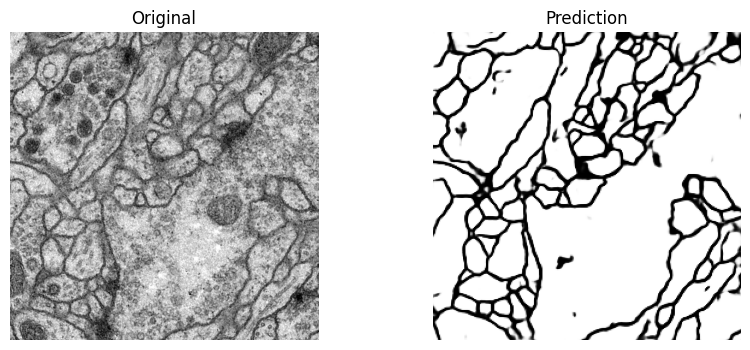

In [27]:
img = imread("data/membrane/test/0.png", as_gray=True)
mask = imread("data/membrane/test/0_predict.png", as_gray=True)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Prediction")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()

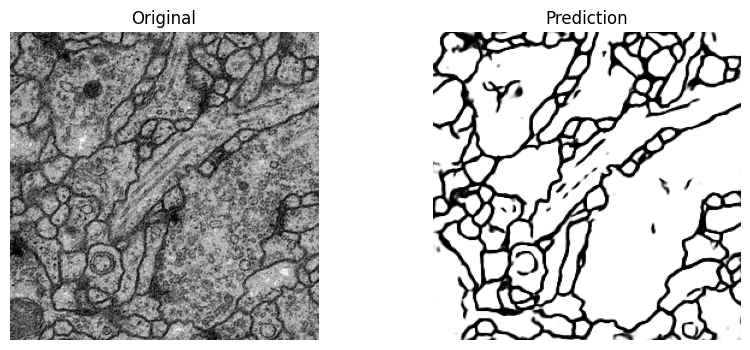

In [29]:
img = imread("data/membrane/test/7.png", as_gray=True)
mask = imread("data/membrane/test/7_predict.png", as_gray=True)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Prediction")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()